Steps:
1. buffer to circle area of each broccoli
2. projects on raw images
3. calculate the transform matrix from raw to dom
3. summarize and sort by raw image names
4. clip to slices and record each offsets
5. use one case to test the effects of reverse calculate

In [1]:
from config import *

The following modules are loaded:
import sys
import platform

from easyric.caas_lite import TiffSpliter
from easyric.objects import Pix4D
from easyric.io import shp, geotiff, plot
from easyric.calculate import geo2raw, geo2tiff

import os
import shapefile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shapely
import tifffile



In [2]:
cp = Paths('0528_p')

In [18]:
p4d = Pix4D(project_path=cp.pix4d_project, 
            raw_img_path=cp.raw_img, 
            project_name=cp.project_name,
            param_folder=cp.pix4d_param)

[Init][Pix4D] No ply given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_group1_densified_point_cloud.ply' at current project folder
[Init][Pix4D] No dom given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_transparent_mosaic_group1.tif' at current project folder
[Init][Pix4D] No dsm given, however find 'broccoli_tanashi_5_20200528_P4M_10m_before_dsm.tif' at current project folder
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]
[io][geotiff][GeoCorrd] Comprehense [* 34737 geo_ascii_params (30s) b'WGS 84 / UTM zone 54N|WGS 84|'] to geotiff coordinate tag [WGS 84 / UTM zone 54N]


In [21]:
grid_len = 1300
buffer_len = 200
ts = TiffSpliter(tif_path=p4d.dom_file, grid_h=grid_len, grid_w=grid_len, grid_buffer=buffer_len)

In [4]:
root_pos = pd.read_csv(f"{cp.root}/10_locate_by_cv/color_label_0417_mavic/keep_bbox_cp.csv", index_col=0)
root_select = root_pos[root_pos.fid >= 0]
root_select

,w,h,area,xc,yc,x0,y0,x1,y1,x_geo,y_geo,keep,cvt_x,cvt_y,fid
57,48.0,58.0,1476.0,2553.0,3883.0,2524.0,3859.0,2582.0,3907.0,368062.841475,3.956059e+06,True,1705.053390,-4323.021294,718
59,65.0,53.0,1779.0,2579.5,3966.5,2553.0,3934.0,2606.0,3999.0,368062.926010,3.956059e+06,True,1713.919228,-4410.175871,719
61,48.0,39.0,1006.0,1912.5,3987.0,1893.0,3963.0,1932.0,4011.0,368060.798280,3.956058e+06,True,1056.820812,-4293.843476,292
63,59.0,63.0,2014.0,2154.5,4063.5,2123.0,4034.0,2186.0,4093.0,368061.570260,3.956058e+06,True,1278.064588,-4418.214980,436
64,60.0,77.0,2412.0,2590.5,4065.0,2552.0,4035.0,2629.0,4095.0,368062.961100,3.956058e+06,True,1704.545349,-4508.843761,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11114,54.0,66.0,2015.0,15907.0,16949.0,15874.0,16922.0,15940.0,16976.0,368105.440735,3.956017e+06,True,12105.129689,-19843.747772,7119
11115,45.0,48.0,680.0,16565.0,16949.5,16541.0,16927.0,16589.0,16972.0,368107.539755,3.956017e+06,True,12749.124154,-19978.795911,7552
11128,68.0,43.0,1352.0,16328.5,16934.0,16307.0,16900.0,16350.0,16968.0,368106.785320,3.956017e+06,True,12520.790778,-19915.260043,7410
11133,24.0,25.0,314.0,16132.5,17003.0,16120.0,16991.0,16145.0,17015.0,368106.160080,3.956017e+06,True,12314.822943,-19942.720570,7266


In [92]:
for idx, row in root_select.iterrows():
    buffered_area = shapely.geometry.Point(row.x_geo, row.y_geo).buffer(0.2)
    break

In [93]:
circle_xy = np.asarray(buffered_area.exterior.coords.xy).T

In [94]:
circle_xy.shape

(65, 2)

In [95]:
circle_xy

array([[ 368063.041475  , 3956058.770185  ],
       [ 368063.04051195, 3956058.75058157],
       [ 368063.03763206, 3956058.73116694],
       [ 368063.03286307, 3956058.71212806],
       [ 368063.02625091, 3956058.69364831],
       [ 368063.01785925, 3956058.67590565],
       [ 368063.00776892, 3956058.65907095],
       [ 368062.99607709, 3956058.64330634],
       [ 368062.98289636, 3956058.62876364],
       [ 368062.96835366, 3956058.61558291],
       [ 368062.95258905, 3956058.60389108],
       [ 368062.93575435, 3956058.59380075],
       [ 368062.91801169, 3956058.58540909],
       [ 368062.89953194, 3956058.57879693],
       [ 368062.88049306, 3956058.57402794],
       [ 368062.86107843, 3956058.57114805],
       [ 368062.841475  , 3956058.570185  ],
       [ 368062.82187157, 3956058.57114805],
       [ 368062.80245694, 3956058.57402794],
       [ 368062.78341806, 3956058.57879693],
       [ 368062.76493831, 3956058.58540909],
       [ 368062.74719565, 3956058.59380075],
       [ 3

In [87]:
# too slow, need to load all and then calculate together
z_value = geotiff.mean_values(p4d.dsm_file, polygon=circle_xy, geo_head=p4d.dsm_header)
z_value

D:/OneDrive/Program/GitHub/EasyIDP\easyric\io\geotiff.py:228: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if polygon == 'all':


97.02359586509962

In [96]:
circle_xyz = np.insert(circle_xy, 2, z_value, axis=1)
circle_xyz

array([[3.68063041e+05, 3.95605877e+06, 9.70235959e+01],
       [3.68063041e+05, 3.95605875e+06, 9.70235959e+01],
       [3.68063038e+05, 3.95605873e+06, 9.70235959e+01],
       [3.68063033e+05, 3.95605871e+06, 9.70235959e+01],
       [3.68063026e+05, 3.95605869e+06, 9.70235959e+01],
       [3.68063018e+05, 3.95605868e+06, 9.70235959e+01],
       [3.68063008e+05, 3.95605866e+06, 9.70235959e+01],
       [3.68062996e+05, 3.95605864e+06, 9.70235959e+01],
       [3.68062983e+05, 3.95605863e+06, 9.70235959e+01],
       [3.68062968e+05, 3.95605862e+06, 9.70235959e+01],
       [3.68062953e+05, 3.95605860e+06, 9.70235959e+01],
       [3.68062936e+05, 3.95605859e+06, 9.70235959e+01],
       [3.68062918e+05, 3.95605859e+06, 9.70235959e+01],
       [3.68062900e+05, 3.95605858e+06, 9.70235959e+01],
       [3.68062880e+05, 3.95605857e+06, 9.70235959e+01],
       [3.68062861e+05, 3.95605857e+06, 9.70235959e+01],
       [3.68062841e+05, 3.95605857e+06, 9.70235959e+01],
       [3.68062822e+05, 3.95605

In [148]:
reverse = geo2raw.get_img_coords_dict(p4d, circle_xyz-p4d.offset.np, 'pmat', distort_correct=True)
reverse.keys()

dict_keys(['DJI_0579.JPG', 'DJI_0580.JPG', 'DJI_0581.JPG', 'DJI_0582.JPG', 'DJI_0583.JPG', 'DJI_0584.JPG', 'DJI_0585.JPG', 'DJI_0586.JPG', 'DJI_0587.JPG', 'DJI_0588.JPG', 'DJI_0643.JPG', 'DJI_0644.JPG', 'DJI_0645.JPG', 'DJI_0646.JPG', 'DJI_0647.JPG', 'DJI_0648.JPG', 'DJI_0649.JPG', 'DJI_0650.JPG', 'DJI_0651.JPG', 'DJI_0652.JPG', 'DJI_0707.JPG', 'DJI_0708.JPG', 'DJI_0709.JPG', 'DJI_0710.JPG'])

In [90]:
from skimage.io import imread

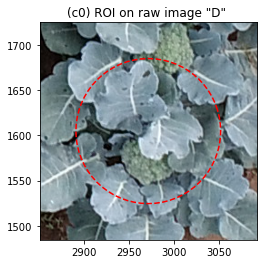

In [149]:
img_name = "DJI_0644.JPG"
img_dict = reverse
img_coord = reverse[img_name]

fig, ax = plt.subplots(1,1)

img_np = imread(p4d.img[img_name].path)
img_coord = img_dict[img_name]
im_xmin, im_ymin = img_coord.min(axis=0)
im_xmax, im_ymax = img_coord.max(axis=0)

buffer=40

ax.imshow(img_np)
ax.plot(*img_coord.T, '--r')

ax.set_xlim(im_xmin-buffer, im_xmax+buffer)
ax.set_ylim(im_ymin-buffer, im_ymax+buffer)

ax.set_title(f'(c{0}) ROI on raw image "{img_name[0]}" ')

plt.show()

In [150]:
# calculate the distance
def calculate_dist2center(p4d, geo2raw_out_dict):
    dist_container = pd.DataFrame(columns=['image', 'xc', 'yc', 'dist', 'angle', 'direction'])
    for i, c in geo2raw_out_dict.items():
        c = np.asarray(c)
        x0, y0 = c.mean(axis=0)
        x1, y1 = 0.5 * p4d.img[i].w, 0.5 * p4d.img[i].h
        d = np.sqrt((x1-x0) ** 2 + (y1 - y0) ** 2)
        
        v1 = np.asarray([x0-x1, y0-y1])
        v0 = np.asarray([0, 1])
        
        # https://blog.csdn.net/qq_32424059/article/details/100874358
        angle = calc_angle_2(v0, v1)
        
        if angle > 45 and angle <= 135:
            direction = 'Right'
        elif angle > 135 and angle <= 225:
            direction = "Down"
        elif angle > 225 and angle <= 315:
            direction = "Left"
        else:
            direction = "Up"
        
        dist_container.loc[len(dist_container)] = {"image":i, "xc":x0, "yc":y0, "dist":d, "angle":angle, "direction":direction}
        dist_container['dist'] = dist_container['dist'].astype(float)

    return dist_container

def calc_angle_2(v1, v2):
    '''
    支持大于180度计算
    https://www.pythonf.cn/read/131921
    '''
    r = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1, 2) * np.linalg.norm(v2, 2)))
    deg = r * 180 / np.pi

    a1 = np.array([*v1, 0])
    a2 = np.array([*v2, 0])

    a3 = np.cross(a1, a2)

    if np.sign(a3[2]) > 0:
        deg = 360 - deg

    return deg

def select_best(dist_container, strategy="min_dist"):
    if strategy == "min_dist":
        dist_container = dist_container.sort_values(by=['dist'], axis=0, ascending=True)
        dist_container = dist_container.reset_index()
    
        return dist_container.iloc[0:10, :]
    else:
        dist_container = dist_container.sort_values(by=['direction', 'dist'], axis=0, ascending=True)
        
        direct = ['Up', 'Right', 'Down', 'Left']

        for i, d in enumerate(direct):
            t_all = reverse_dist[reverse_dist.direction == d]
            t = t_all.iloc[0,:]
            ax.scatter(t.xc, t.yc, c=color[i])
        
    

In [151]:
reverse_dist = calculate_dist2center(p4d, reverse)
reverse_dist

,image,xc,yc,dist,angle,direction
0,DJI_0579.JPG,701.218548,538.234326,2406.975057,237.711464,Left
1,DJI_0580.JPG,620.541634,1302.588382,2178.768959,256.153898,Left
2,DJI_0581.JPG,469.934085,2125.573560,2286.044912,277.580518,Left
3,DJI_0582.JPG,433.695475,3004.065755,2587.114476,297.137794,Left
4,DJI_0583.JPG,457.418055,3531.426329,2847.321610,306.845587,Left
5,DJI_0584.JPG,1674.915316,3568.364176,2041.741189,328.688139,Up
6,DJI_0585.JPG,1750.442781,2729.856523,1338.618345,312.587089,Left
7,DJI_0586.JPG,1848.391066,1972.679188,899.975067,279.509067,Left
8,DJI_0587.JPG,1911.672610,1259.302123,999.199349,235.587266,Left
9,DJI_0588.JPG,1985.640868,476.078266,1542.702768,209.103749,Down


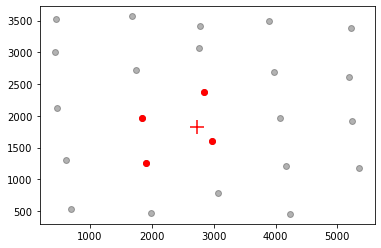

In [152]:
fig, ax = plt.subplots(1,1)

reverse_dist_sort = reverse_dist.copy().sort_values(by=['dist'], axis=0, ascending=True)

ax.scatter(reverse_dist_sort.xc, reverse_dist_sort.yc, c='k', alpha=0.3)
ax.scatter(reverse_dist_sort.xc[0:4], reverse_dist_sort.yc[0:4], c='r')
ax.scatter(0.5 * p4d.img[0].w, 0.5 * p4d.img[0].h, marker="+", c='r', s=200)

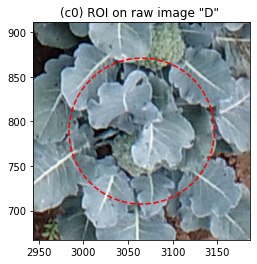

In [153]:
img_name = "DJI_0643.JPG"
img_dict = reverse
img_coord = reverse[img_name]

fig, ax = plt.subplots(1,1)

img_np = imread(p4d.img[img_name].path)
img_coord = img_dict[img_name]
im_xmin, im_ymin = img_coord.min(axis=0)
im_xmax, im_ymax = img_coord.max(axis=0)

buffer=40

ax.imshow(img_np)
ax.plot(*img_coord.T, '--r')

ax.set_xlim(im_xmin-buffer, im_xmax+buffer)
ax.set_ylim(im_ymin-buffer, im_ymax+buffer)

ax.set_title(f'(c{0}) ROI on raw image "{img_name[0]}" ')

plt.show()

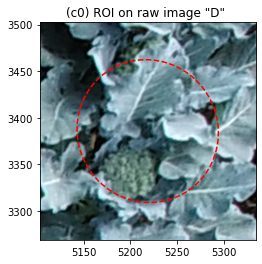

In [154]:
img_name = "DJI_0710.JPG"
img_dict = reverse
img_coord = reverse[img_name]

fig, ax = plt.subplots(1,1)

img_np = imread(p4d.img[img_name].path)
img_coord = img_dict[img_name]
im_xmin, im_ymin = img_coord.min(axis=0)
im_xmax, im_ymax = img_coord.max(axis=0)

buffer=40

ax.imshow(img_np)
ax.plot(*img_coord.T, '--r')

ax.set_xlim(im_xmin-buffer, im_xmax+buffer)
ax.set_ylim(im_ymin-buffer, im_ymax+buffer)

ax.set_title(f'(c{0}) ROI on raw image "{img_name[0]}" ')

plt.show()

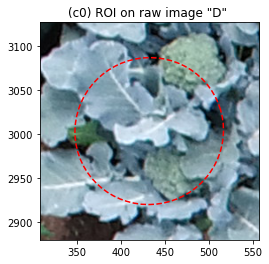

In [155]:
img_name = "DJI_0582.JPG"
img_dict = reverse
img_coord = reverse[img_name]

fig, ax = plt.subplots(1,1)

img_np = imread(p4d.img[img_name].path)
img_coord = img_dict[img_name]
im_xmin, im_ymin = img_coord.min(axis=0)
im_xmax, im_ymax = img_coord.max(axis=0)

buffer=40

ax.imshow(img_np)
ax.plot(*img_coord.T, '--r')

ax.set_xlim(im_xmin-buffer, im_xmax+buffer)
ax.set_ylim(im_ymin-buffer, im_ymax+buffer)

ax.set_title(f'(c{0}) ROI on raw image "{img_name[0]}" ')

plt.show()

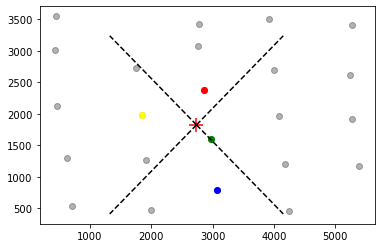

In [137]:
fig, ax = plt.subplots(1,1)
ax.scatter(reverse_dist.xc, reverse_dist.yc, c='k', alpha=0.3)

x1, y1 = 0.5 * p4d.img[i].w, 0.5 * p4d.img[i].h

ax.scatter(x1, y1, marker="+", c='r', s=200)

color = ['red', 'green', 'blue', 'yellow']
direct = ['Up', 'Right', 'Down', 'Left']
angles = [45, 135, 225, 315]

for i, d in enumerate(direct):
    t_all = reverse_dist[reverse_dist.direction == d]
    t = t_all.iloc[0,:]
    ax.scatter(t.xc, t.yc, c=color[i])
    
for angle in angles:
    length = 2000
    endy = y1 + length * np.sin(np.radians(angle))
    endx = x1 + length * np.cos(np.radians(angle))
    ax.plot([x1, endx], [y1, endy], 'k--')
    
plt.show()

In [143]:
reverse_dist.groupby(['direction'])['dist'].transform('min')

0     1085.984910
1     1085.984910
2      899.114905
3      899.114905
4      899.114905
5      899.114905
6      899.114905
7      899.114905
8      899.114905
9      899.114905
10     322.358426
11     322.358426
12     322.358426
13     322.358426
14     322.358426
15     322.358426
16     322.358426
17     322.358426
18     322.358426
19     562.483673
20     562.483673
21     562.483673
22     562.483673
Name: dist, dtype: float64

In [141]:
# https://stackoverflow.com/questions/47851540/select-and-minimum-value-of-a-data-frame-column-by-category
# 
reverse_dist[reverse_dist.groupby(['direction'])['dist'].transform('min') == reverse_dist['dist']]

,index,image,xc,yc,dist,angle,direction
0,9,DJI_0643.JPG,3067.655186,789.897461,1085.984910,162.218025,Down
2,6,DJI_0586.JPG,1849.357722,1973.241696,899.114905,279.554596,Left
10,10,DJI_0644.JPG,2972.669207,1605.133281,322.358426,132.762002,Right
19,11,DJI_0645.JPG,2850.725397,2374.659574,562.483673,11.768753,Up


In [145]:
reverse_dist.loc[reverse_dist.groupby('direction').dist.idxmin()]

,index,image,xc,yc,dist,angle,direction
0,9,DJI_0643.JPG,3067.655186,789.897461,1085.984910,162.218025,Down
2,6,DJI_0586.JPG,1849.357722,1973.241696,899.114905,279.554596,Left
10,10,DJI_0644.JPG,2972.669207,1605.133281,322.358426,132.762002,Right
19,11,DJI_0645.JPG,2850.725397,2374.659574,562.483673,11.768753,Up


In [142]:
reverse_dist

,index,image,xc,yc,dist,angle,direction
0,9,DJI_0643.JPG,3067.655186,789.897461,1085.984910,162.218025,Down
1,8,DJI_0588.JPG,1988.043657,478.547049,1539.377256,209.070302,Down
2,6,DJI_0586.JPG,1849.357722,1973.241696,899.114905,279.554596,Left
3,7,DJI_0587.JPG,1913.380927,1260.636667,997.035798,235.595055,Left
4,5,DJI_0585.JPG,1750.206736,2732.835492,1340.809573,312.673986,Left
5,1,DJI_0580.JPG,622.791381,1305.684410,2175.845059,256.218878,Left
6,2,DJI_0581.JPG,469.239134,2130.169539,2287.344445,277.692341,Left
7,0,DJI_0579.JPG,704.540516,541.541647,2402.400271,237.735823,Left
8,3,DJI_0582.JPG,428.394359,3014.784867,2596.731097,297.294918,Left
9,4,DJI_0583.JPG,449.277710,3548.939750,2864.352627,307.028291,Left
